<a href="https://colab.research.google.com/github/shay-dan/DS_workshop_OpenUIL/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.EDA

Let's start by checking image color distributions:

Average channels intensity:

In [ ]:
def calculate_channel_average(img, channel):
    img = cv2.imread(img)
    channel_dict = {"R": 0, "G": 1, "B": 2}
    channel_idx = channel_dict[channel]
    channel_intensities = np.array([row[:, channel_idx] for row in img]).flatten()
    return np.mean(channel_intensities)

# Calculating channel average over all labels
red_channel_average = total_df_cleaned_no_dups.groupby("class").agg({"Image": lambda s: np.mean([calculate_channel_average(img, channel="R") for img in s])}).reset_index()
green_channel_average = total_df_cleaned_no_dups.groupby("class").agg({"Image": lambda s: np.mean([calculate_channel_average(img, channel="G") for img in s])}).reset_index()
blue_channel_average = total_df_cleaned_no_dups.groupby("class").agg({"Image": lambda s: np.mean([calculate_channel_average(img, channel="B") for img in s])}).reset_index()

<ipython-input-45-a39cb43a4363>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[label for label in df["class"]], y=values, palette=np.array(pal[::-1])[rank])
<ipython-input-45-a39cb43a4363>:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=[label for label in df["class"]], y=values, palette=np.array(pal[::-1])[rank])
<ipython-input-45-a39cb43a4363>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-45-a39cb43a4363>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=

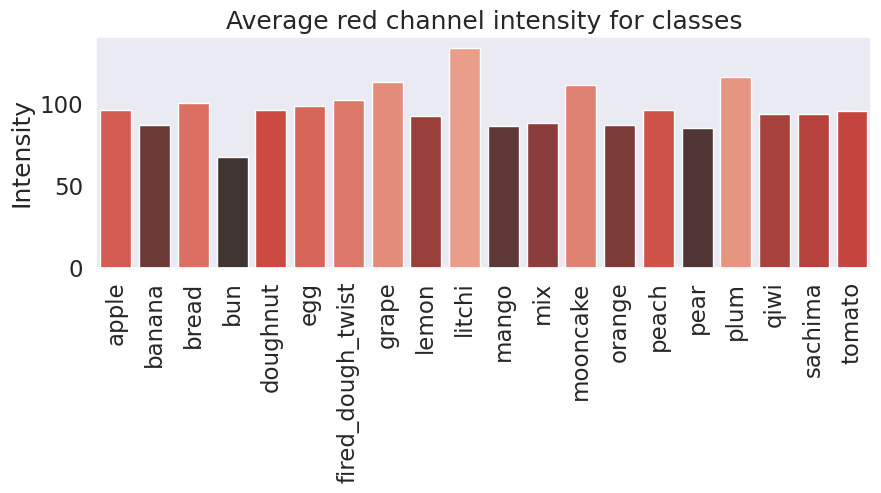

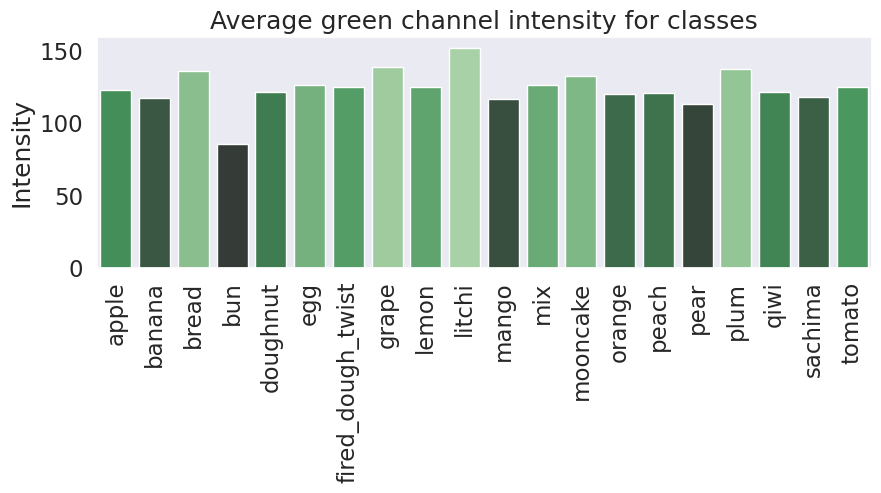

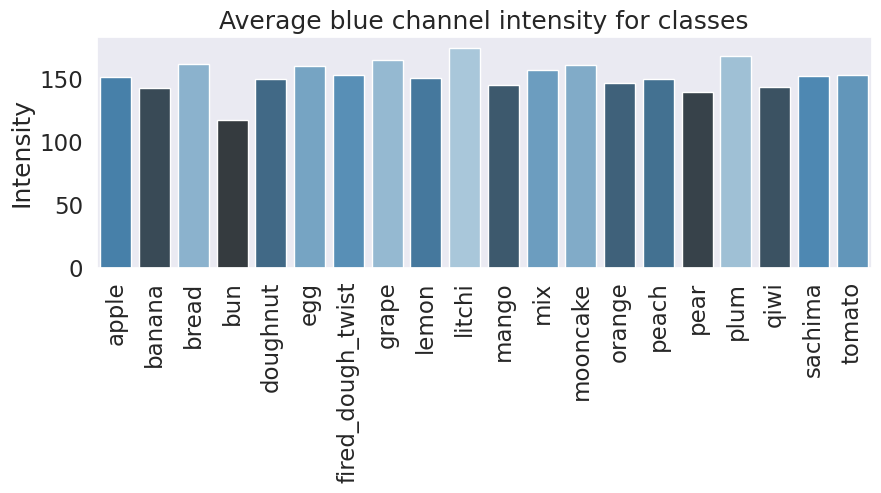

In [ ]:
def plot_channel_intensity_barplot(df, channel):
    title_dict = {"r": "red", "g": "green", "b": "blue"}
    palet_dict = {"r": "Reds_d", "g": "Greens_d", "b": "Blues_d"}
    plt.figure(figsize=(10,3))

    values = df["Image"].values
    pal = sns.color_palette(palet_dict[channel], len(values))
    rank = values.argsort().argsort()
    ax = sns.barplot(x=[label for label in df["class"]], y=values, palette=np.array(pal[::-1])[rank])

    plt.ylabel("Intensity")
    plt.title(f"Average {title_dict[channel]} channel intensity for classes")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plot_channel_intensity_barplot(red_channel_average, "r")
plot_channel_intensity_barplot(green_channel_average, "g")
plot_channel_intensity_barplot(blue_channel_average, "b");

In [ ]:
def set_type_array(channel, df):

    df["type"] = [channel for _ in range(len(df))]

set_type_array("red", red_channel_average)
set_type_array("green", green_channel_average)
set_type_array("blue", blue_channel_average)

channel_averages = pd.concat([red_channel_average, green_channel_average, blue_channel_average])

<ipython-input-47-2f796926dc8f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


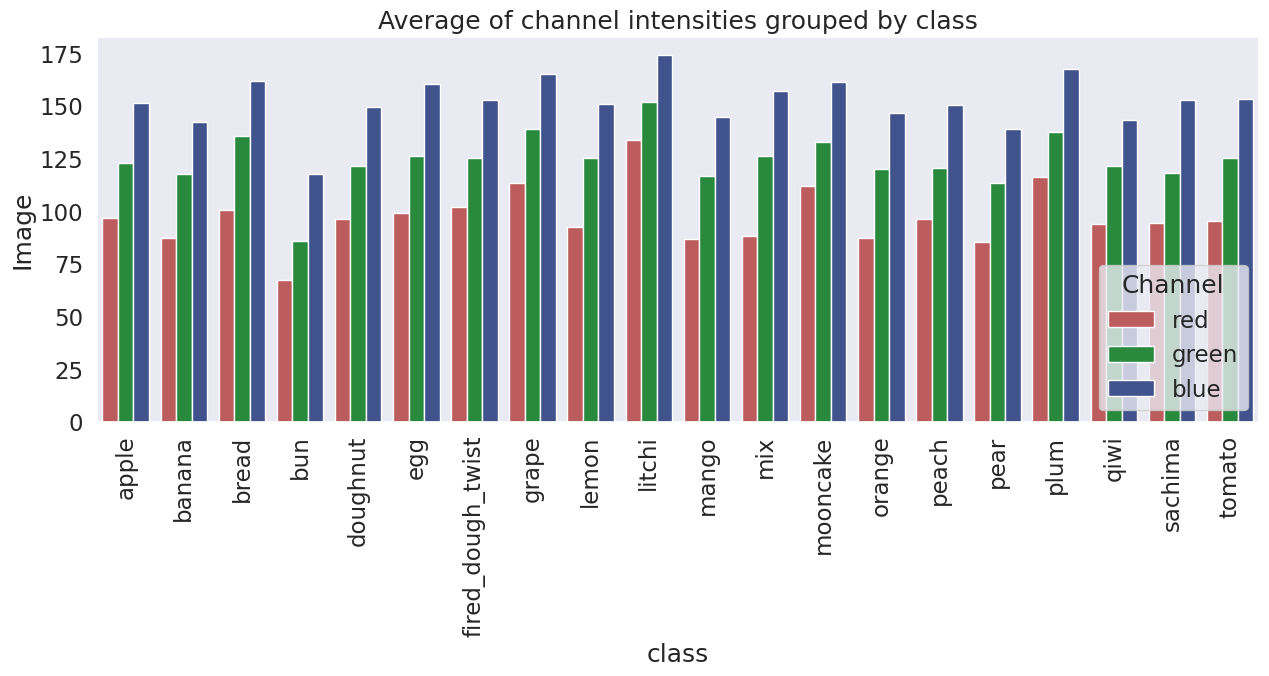

In [ ]:
plt.figure(figsize=(15,5))

colors = [[0.8, 0.3, 0.3], [0.1, 0.6, 0.2], [0.2, 0.3, 0.6] ]

ax = sns.barplot(x=[label for label in channel_averages["class"]], y="Image", hue="type", data=channel_averages, palette=colors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.xlabel("class")
plt.title("Average of channel intensities grouped by class")
ax.legend(title="Channel",loc="lower right");

We can see that on average the distributions differ between classes, and that all across the classes, Blue>Green>Red per channel intensity. let's look at standard deviation (std) and see some numbers, by sampling 1 image per class

In [ ]:
def average_channel_intensity(image, channel):
    channel_dict = {"R": 0, "G": 1, "B": 2}
    channel_idx = channel_dict[channel]
    channel_intensities = np.array([row[:, channel_idx] for row in image]).flatten()
    return np.mean(channel_intensities)

def standard_deviation_channel_intensity(image, channel):
    channel_dict = {"R": 0, "G": 1, "B": 2}
    channel_idx = channel_dict[channel]
    channel_intensities = np.array([row[:, channel_idx] for row in image]).flatten()
    return np.std(channel_intensities)

classes = list(total_df_cleaned_no_dups["class"].unique())
for cls in classes:
  for im in total_df_cleaned_no_dups["Image"]:
    if im.split("/")[-1].split("0")[0] == cls:
      label = cls
      image = cv2.imread(im)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      avg_r = average_channel_intensity(image, "R")
      avg_g = average_channel_intensity(image, "G")
      avg_b = average_channel_intensity(image, "B")
      std_r = standard_deviation_channel_intensity(image, "R")
      std_g = standard_deviation_channel_intensity(image, "G")
      std_b = standard_deviation_channel_intensity(image, "B")
      plt.imshow(image)
      print("average red channel intensity: ",avg_r)
      print("average red std channel intensity: ",std_r)
      print("average green channel intensity:", avg_g)
      print("average green std channel intensity: ",std_g)
      print("average blue channel intensity:",avg_b)
      print("average blue std channel intensity: ",std_b)
      plt.axis('off')
      plt.show()
      break


Now let's look at greyscale:

In [ ]:
def grayscale_intensity(image):
    grayscaled_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(grayscaled_image)

classes = list(total_df_cleaned_no_dups["class"].unique())
for cls in classes:
  for im in total_df_cleaned_no_dups["Image"]:
    if im.split("/")[-1].split("0")[0] == cls:
      label = cls
      image = cv2.imread(im)
      print(label, grayscale_intensity(image))
      break

doughnut 169.3653482634884
bread 120.04984060617711
plum 157.677151416122
tomato 141.18893574586698
orange 138.68392565359477
mango 120.34799916698705
lemon 78.76062291746764
fired_dough_twist 139.54707839926093
mooncake 116.53247549019608
mix 125.4244160899654
sachima 145.09961913687044
pear 137.97010965333845
litchi 143.59289095540177
bun 98.25632769447648
apple 124.74979575163398
banana 134.73221237024222
egg 149.428637222863
qiwi 121.74268710752274
peach 108.0599849416891
grape 155.95742222542611


In [ ]:
def get_grayed_image(image):
    image = cv2.imread(image)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


def get_gray_histogram(image):
    """
    Calculates a histogram of gray intensities given an image.
    Using one channel, gray with 256 bins and a possible range of 0 to 256.
    """
    grayed_img = get_grayed_image(image)    # Convert to grayscale
    return cv2.calcHist([grayed_img], [0], None, [256], [0, 256])

classes = list(total_df_cleaned_no_dups["class"].unique())
for cls in classes:
  for im in total_df_cleaned_no_dups["Image"]:
    if im.split("/")[-1].split("0")[0] == cls:
      f, axes = plt.subplots(figsize=(20,4), ncols=3, nrows=1)
      label = cls

      image = cv2.imread(im)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      axes[0].imshow(image)
      axes[0].title.set_text('Original ' + label)
      axes[0].axis('off')

      axes[1].imshow(get_grayed_image(im), cmap='gray')
      axes[1].title.set_text('Grayscaled ' + label)
      axes[1].axis('off')

      hist = get_gray_histogram(im)
      hist = hist.flatten()

      # Plotting the distribution
      plt.title('Grayscale Histogram')
      plt.xlabel('Pixel value')
      plt.ylabel('# of pixels')
      plt.xlim(0, 256)
      axes[2].plot(hist)
      break

Now let's look at color histograms:

In [ ]:
def get_color_histograms(image):
    """
    Calculates a histogram of rgb intensities given an image.
    Using one channel at a time (red, green and blue) with 100 bins and a possible range of 0 to 256.
    """
    channels_values = cv2.split(image)
    colors = ("b", "g", "r") # cv2 splits in reverse order
    hist_list = []
    for (channel, color) in zip(channels_values, colors):
        #Creating a histogram for the current histogram, combining them later
        hist = cv2.calcHist([channel], [0], None, [100], [0, 256])
        hist_list.append(hist)

    return hist_list


classes = list(total_df_cleaned_no_dups["class"].unique())
for cls in classes:
  for im in total_df_cleaned_no_dups["Image"]:
    if im.split("/")[-1].split("0")[0] == cls:
      image = cv2.imread(im)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      fig, axes = plt.subplots(figsize=(20,4), ncols=2, nrows=1)
      axes[0].imshow(image)
      axes[0].axis("off")
      axes[0].title.set_text(cls)
      histograms = get_color_histograms(image)
      plt.title('Color Histograms')
      plt.xlabel('Bin number')
      plt.ylabel('# of pixels')
      plt.xlim(0, 100)
      colors = ['b', 'g', 'r']
      for i, hist in enumerate(histograms):
        axes[1].plot(hist, color=colors[i])
      plt.show()
      break


We can see that on images with red plates the color histogram is a bit different, also we can see that for some images the lighting is different.

In [ ]:
classes = list(total_df_cleaned_no_dups["class"].unique())
for cls in classes:
  count = 0
  for im in total_df_cleaned_no_dups["Image"]:
    if im.split("/")[-1].split("0")[0] == cls:
      if count == 5:
        break
      image = cv2.imread(im)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      fig, axes = plt.subplots(figsize=(20,4), ncols=2, nrows=1)
      axes[0].imshow(image)
      axes[0].axis("off")
      axes[0].title.set_text(cls)
      histograms = get_color_histograms(image)
      plt.title('Color Histograms')
      plt.xlabel('Bin number')
      plt.ylabel('# of pixels')
      plt.xlim(0, 100)
      colors = ['b', 'g', 'r']
      for i, hist in enumerate(histograms):
        axes[1].plot(hist, color=colors[i])
      plt.show()
      count += 1

Now we plotted 5 images for each class, we can see that the color histograms  differ greatly. we believe it's due to:
1. different lighting when taking the images - some are darker or brighter
2. images on red plates are different from images on white plates
3. images taken from top differ from images taken from the side.
maybe we can normalize the colors or brightness, first let's see if any images are too dark or too bright, where we define too bright images to have "lightness" (of LAB format (*)) over 0.6, and too dark to have "lightness" under 0.4, with very bright/very dark to have a threshold of 0.8/0.2 respectivaly:

(*) LAB format:
"L" is for lightness. It goes from 0 to 100.

"A" is red to green. The negative axis is green and the positive is red.

"B" goes from yellow to blue. Blue lies on the negative side and yellow on the positive one.

In [ ]:
def brightness(image):
    image = cv2.imread(image)
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize L channel by dividing all pixel values with maximum pixel value
    L = L/np.max(L)
    # Return mean
    return np.mean(L)

def isbright(image, thresh):
    image = cv2.imread(image)
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    L = L/np.max(L)
    # Return True if mean is greater than threshold
    return np.mean(L) > thresh

def isdark(image, thresh):
    image = cv2.imread(image)
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    L = L/np.max(L)
    return np.mean(L) < thresh

In [ ]:
bright = []
very_bright = []
dark = []
very_dark = []

for im in total_df_cleaned_no_dups["Image"]:
  br = isbright(im,0.6)
  dr = isdark(im,0.4)
  if br:
    bright.append(im)
  if dr:
    dark.append(im)

for im in bright:
  br = isbright(im,0.8)
  if br:
    very_bright.append(im)

for im in dark:
  dr = isdark(im,0.2)
  if dr:
    very_dark.append(im)

In [ ]:
print("Numer of bright images is:" ,len(bright))
print("Numer of very bright images is:" ,len(very_bright))
print("Numer of dark images is:" ,len(dark))
print("Numer of verydark images is:" ,len(very_dark))

Numer of bright images is: 914
Numer of very bright images is: 0
Numer of dark images is: 385
Numer of verydark images is: 15


In [ ]:
classes_dict = {'plum': 0,
      'mix': 0,
      'lemon': 0,
      'banana': 0,
      'pear': 0,
      'orange': 0,
      'apple': 0,
      'peach': 0,
      'mango': 0,
      'bun': 0,
      'doughnut': 0,
      'egg': 0,
      'litchi': 0,
      'bread': 0,
      'fired_dough_twist': 0,
      'mooncake': 0,
      'tomato': 0,
      'qiwi': 0,
      'sachima': 0,
      'grape': 0}

In [ ]:
value_count = dict(total_df_no_dups["class"].value_counts())
bright_classes_dict = classes_dict.copy()
dark_classes_dict = classes_dict.copy()
very_dark_classes_dict = classes_dict.copy()
for k in classes_dict.keys():
  for im in bright:
    if im.split("/")[-1].split("0")[0] == k:
      bright_classes_dict[k] += 1
  for im in dark:
    if im.split("/")[-1].split("0")[0] == k:
      dark_classes_dict[k] += 1
  for im in very_dark:
    if im.split("/")[-1].split("0")[0] == k:
      very_dark_classes_dict[k] += 1
br_cls = []
for cls, count in value_count.items():
  for k,v in bright_classes_dict.items():
    if cls == k:
      if v/count*100 > 40:
        br_cls.append(cls)
print("classes with over 40% bright images are: ",list(br_cls))
dr_cls = []
for cls, count in value_count.items():
  for k,v in dark_classes_dict.items():
    if cls == k:
      if v/count*100 > 40:
        dr_cls.append(cls)
print("classes with over 40% dark images are: ",list(dr_cls))

classes with over 40% bright images are:  ['plum', 'mooncake', 'peach', 'litchi', 'bread', 'grape']
classes with over 40% dark images are:  ['bun']


We can see some classes which are brighter or darker on average. Now let's see some bright images

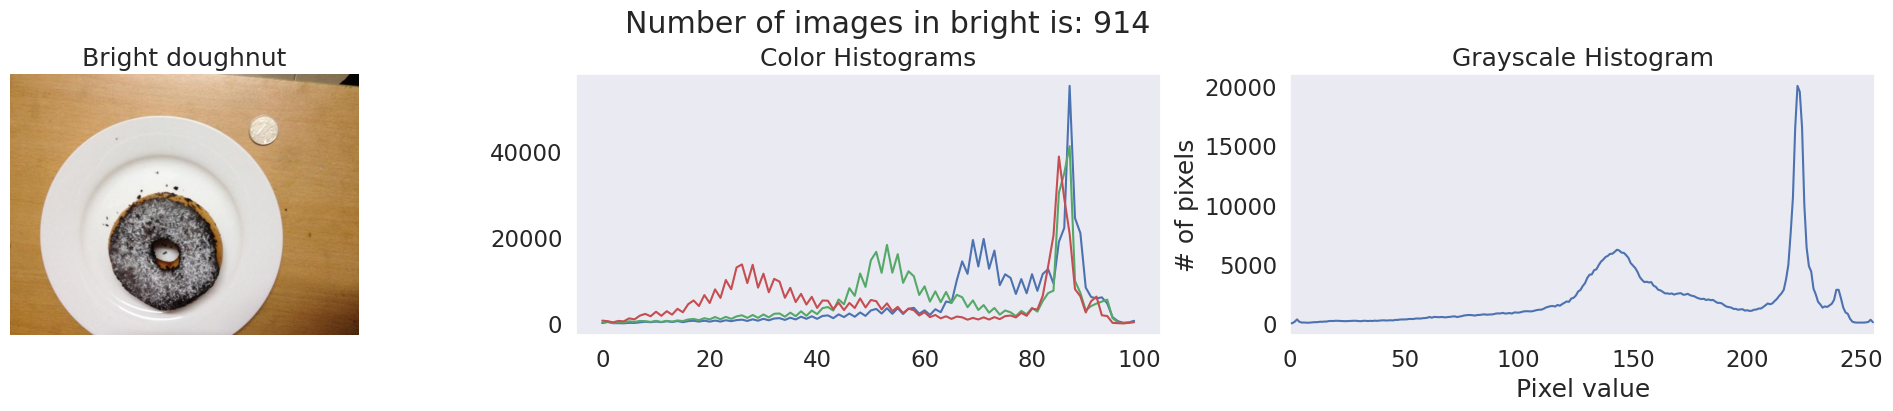

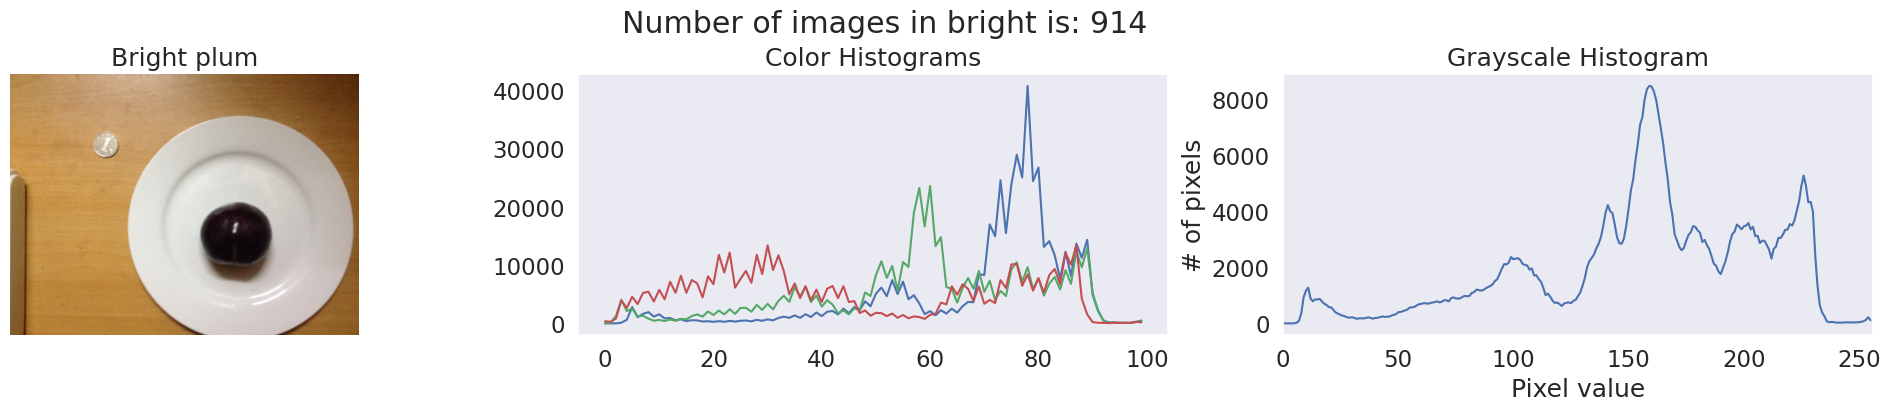

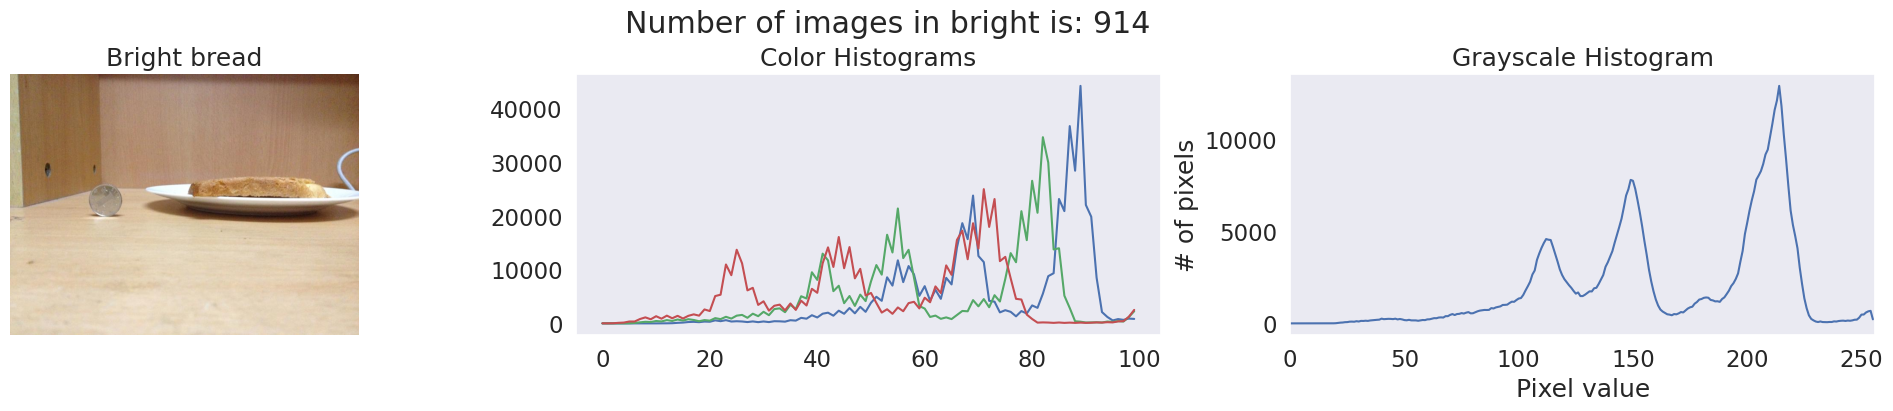

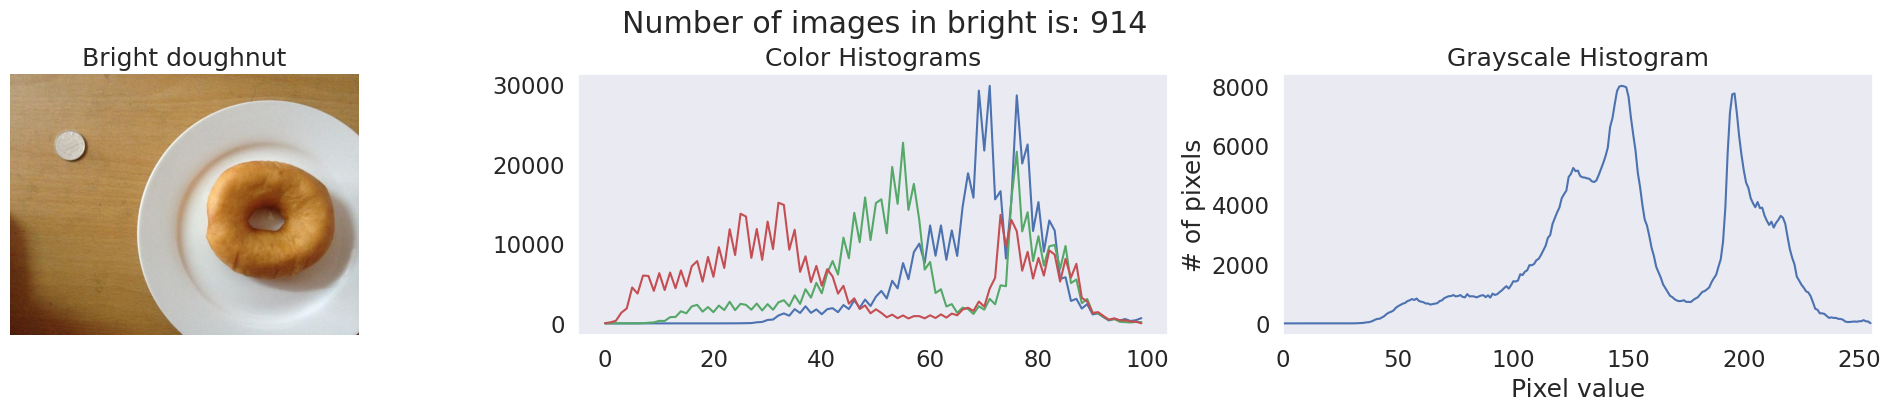

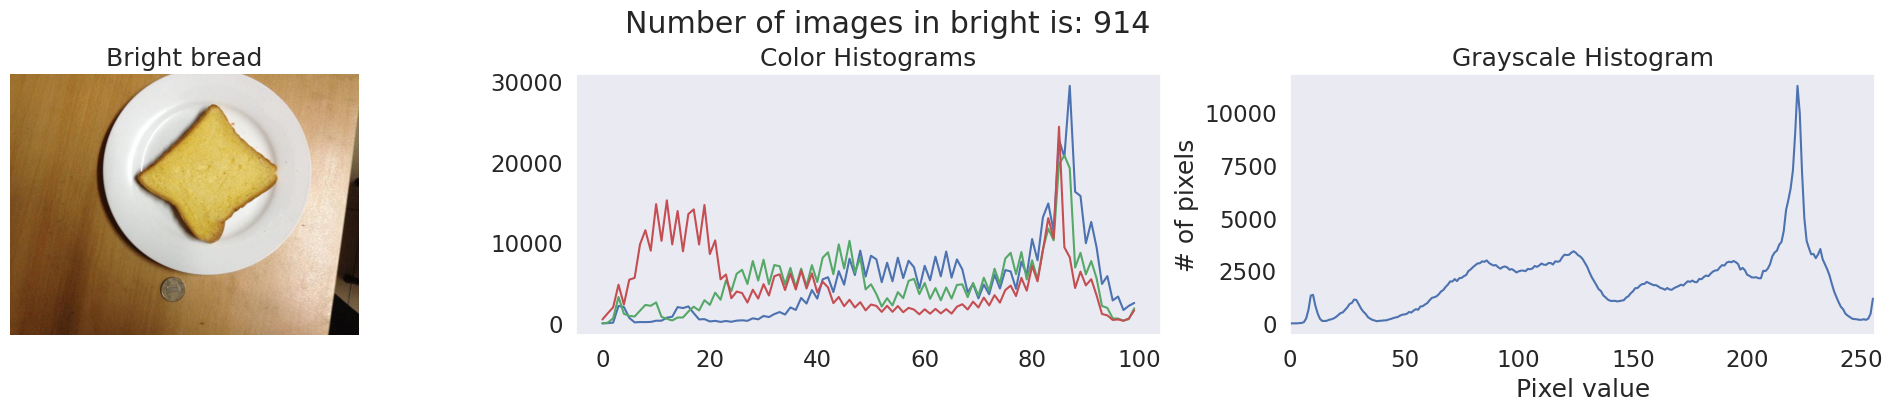

In [ ]:
for im in bright[:5]:
  tmp = im.split("/")[-1].split("0")[0]
  image = cv2.imread(im)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  fig, axes = plt.subplots(figsize=(20,4), ncols=3, nrows=1,constrained_layout=True)
  fig.suptitle("Number of images in bright is: " + str(len(bright)))
  axes[0].imshow(image)
  axes[0].axis("off")
  axes[0].title.set_text("Bright " + tmp)
  histograms = get_color_histograms(image)
  plt.xlabel('Bin number')
  plt.ylabel('# of pixels')
  plt.xlim(0, 100)
  colors = ['b', 'g', 'r']
  for i, hist in enumerate(histograms):
    axes[1].plot(hist, color=colors[i])
    axes[1].title.set_text("Color Histograms")

  hist = get_gray_histogram(im)
  hist = hist.flatten()
  plt.title('Grayscale Histogram')
  plt.xlabel('Pixel value')
  plt.ylabel('# of pixels')
  plt.xlim(0, 256)
  axes[2].plot(hist)
  plt.show()

We can see that the color and greyscale histograms are shifted to the right, with several peeks on pixel values over 120.

There are no "very bright" images, let's see some dark images:

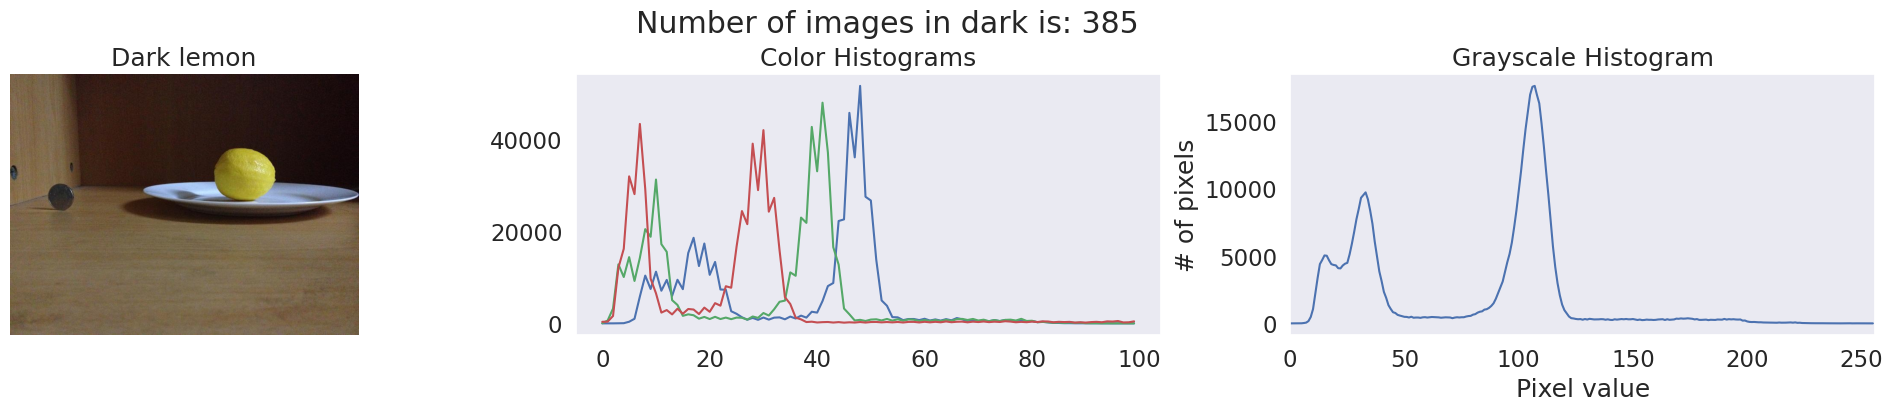

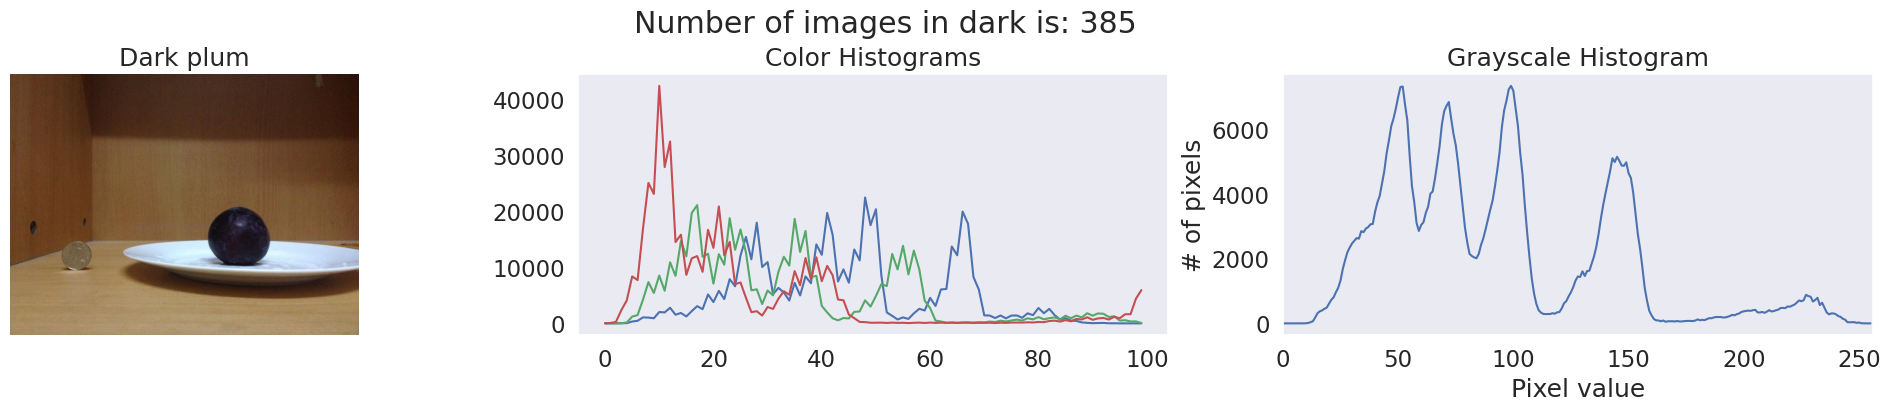

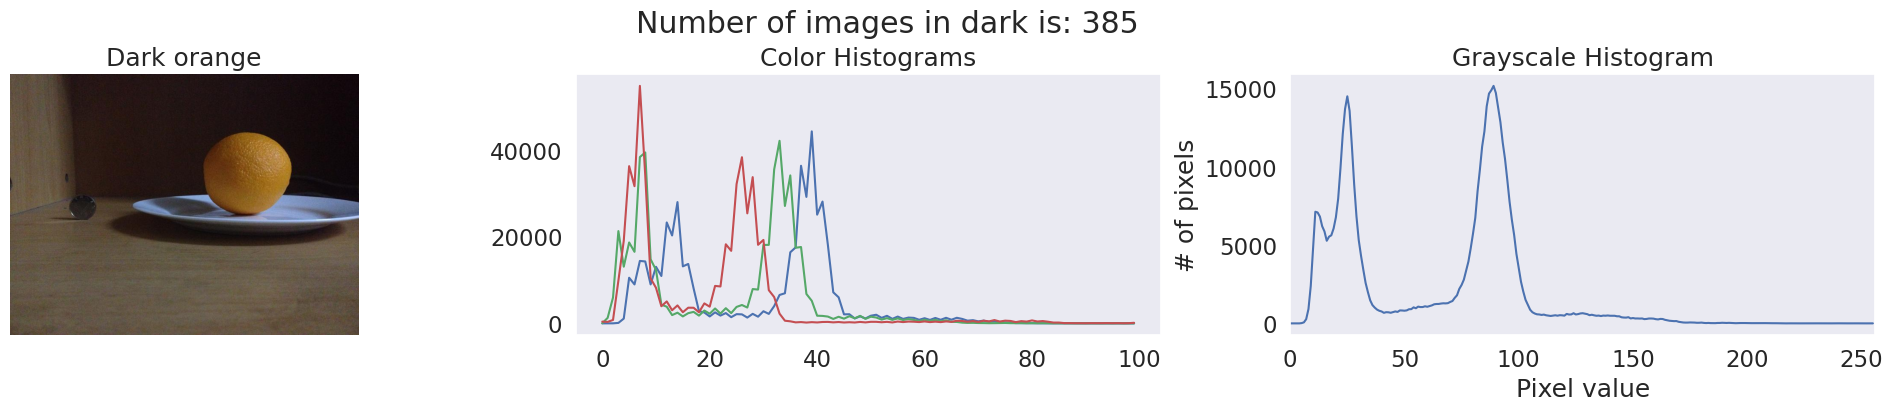

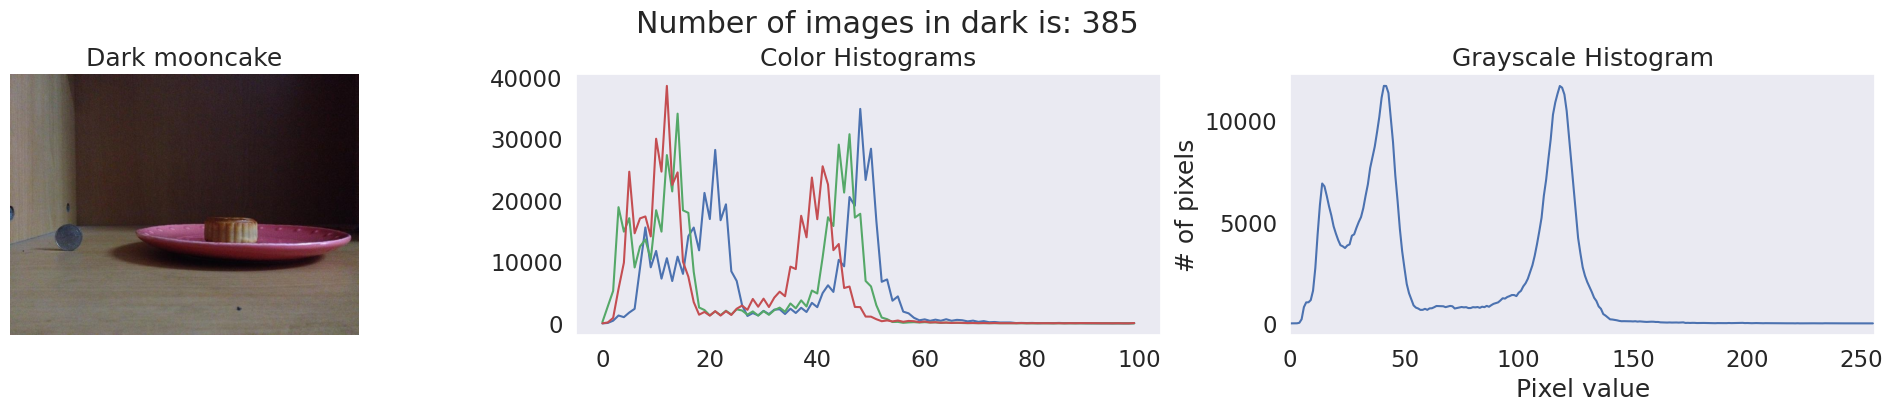

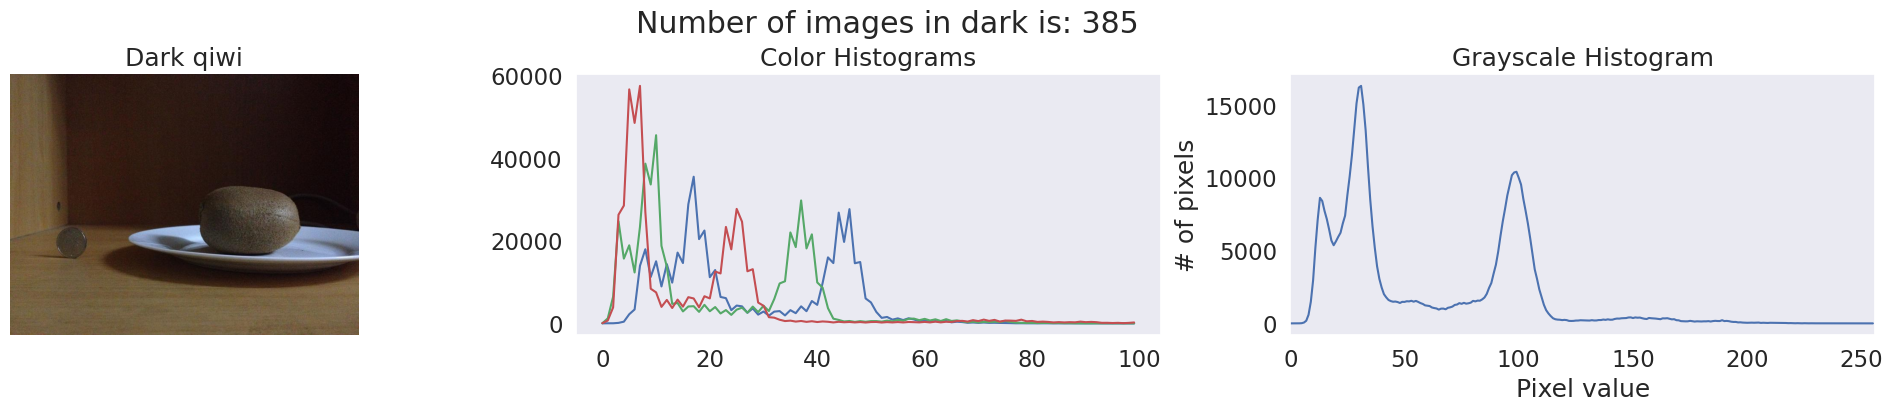

In [ ]:
for im in dark[:5]:
  tmp = im.split("/")[-1].split("0")[0]
  image = cv2.imread(im)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  fig, axes = plt.subplots(figsize=(20,4), ncols=3, nrows=1,constrained_layout=True)
  fig.suptitle("Number of images in dark is: " + str(len(dark)))
  axes[0].imshow(image)
  axes[0].axis("off")
  axes[0].title.set_text("Dark " + tmp)
  histograms = get_color_histograms(image)
  plt.xlabel('Bin number')
  plt.ylabel('# of pixels')
  plt.xlim(0, 100)
  colors = ['b', 'g', 'r']
  for i, hist in enumerate(histograms):
    axes[1].plot(hist, color=colors[i])
    axes[1].title.set_text("Color Histograms")

  hist = get_gray_histogram(im)
  hist = hist.flatten()
  plt.title('Grayscale Histogram')
  plt.xlabel('Pixel value')
  plt.ylabel('# of pixels')
  plt.xlim(0, 256)
  axes[2].plot(hist)
  plt.show()

We can see that the color and greyscale histograms are shifted to the left, with several peeks on pixel values under 140.

Let's see some very dark images:

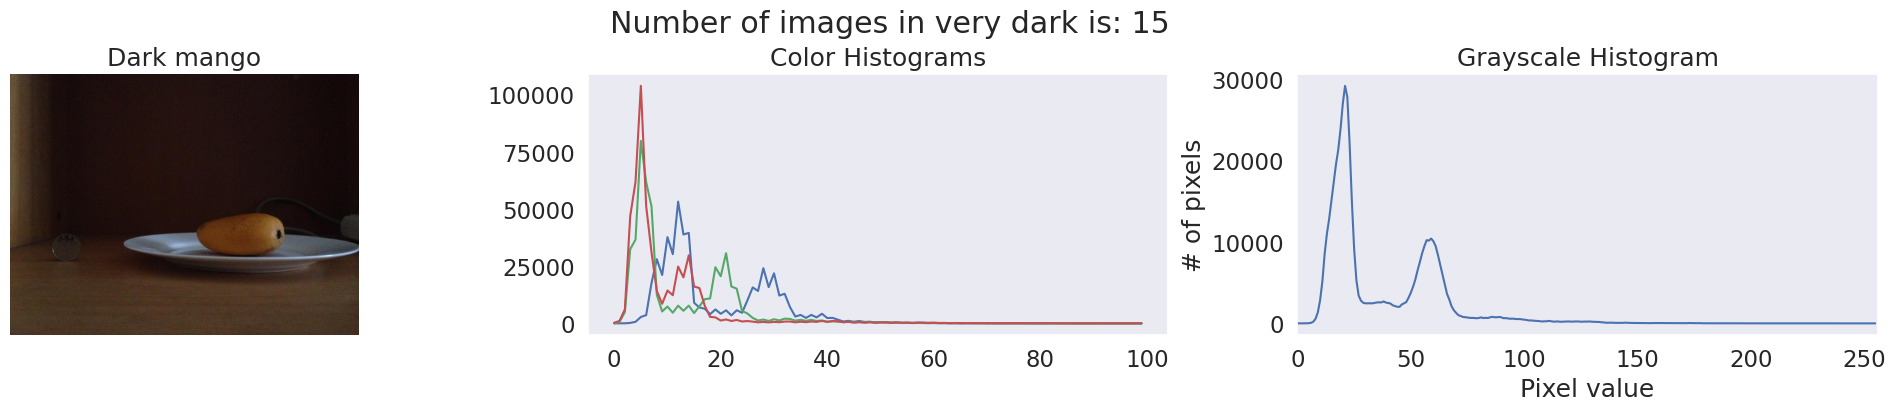

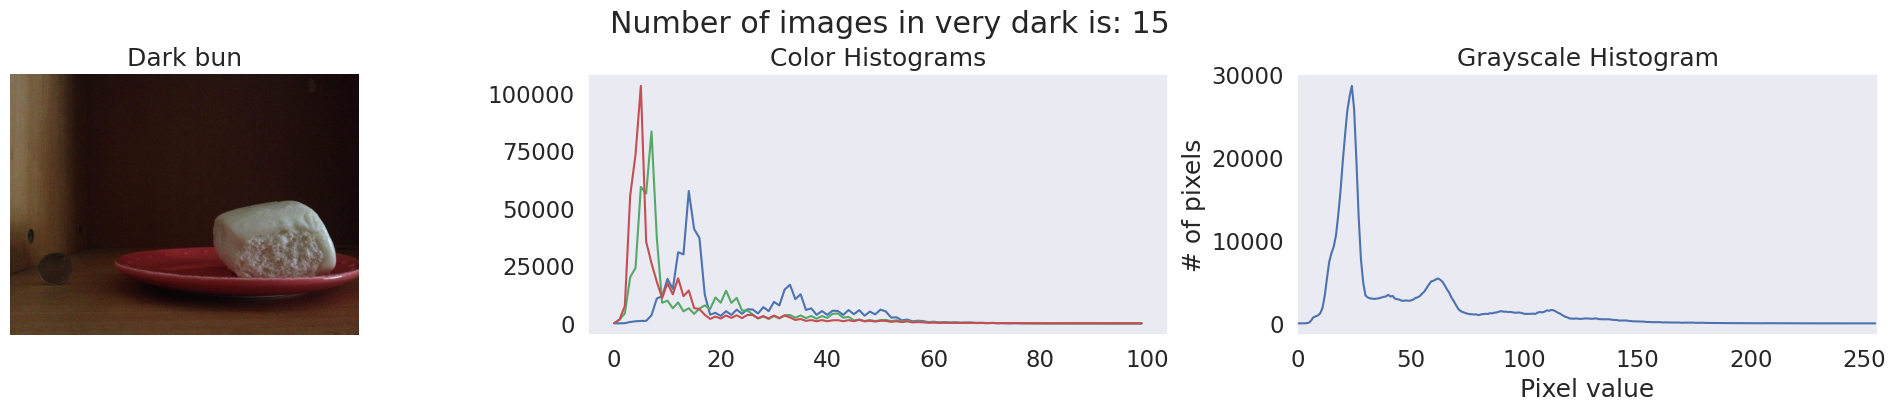

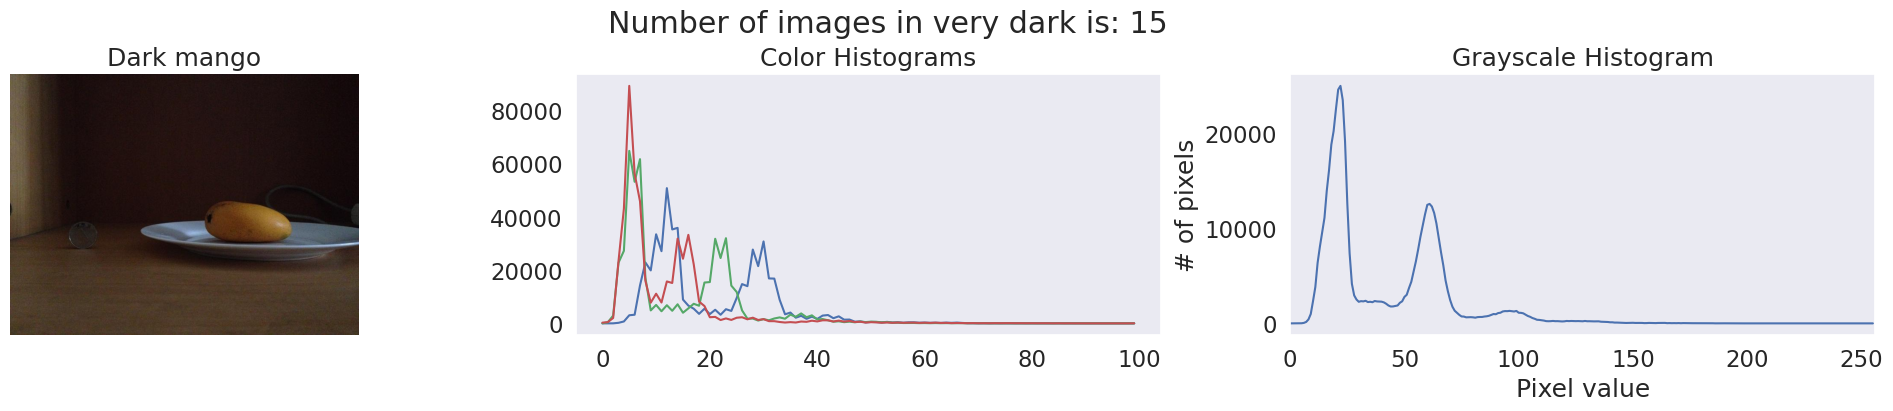

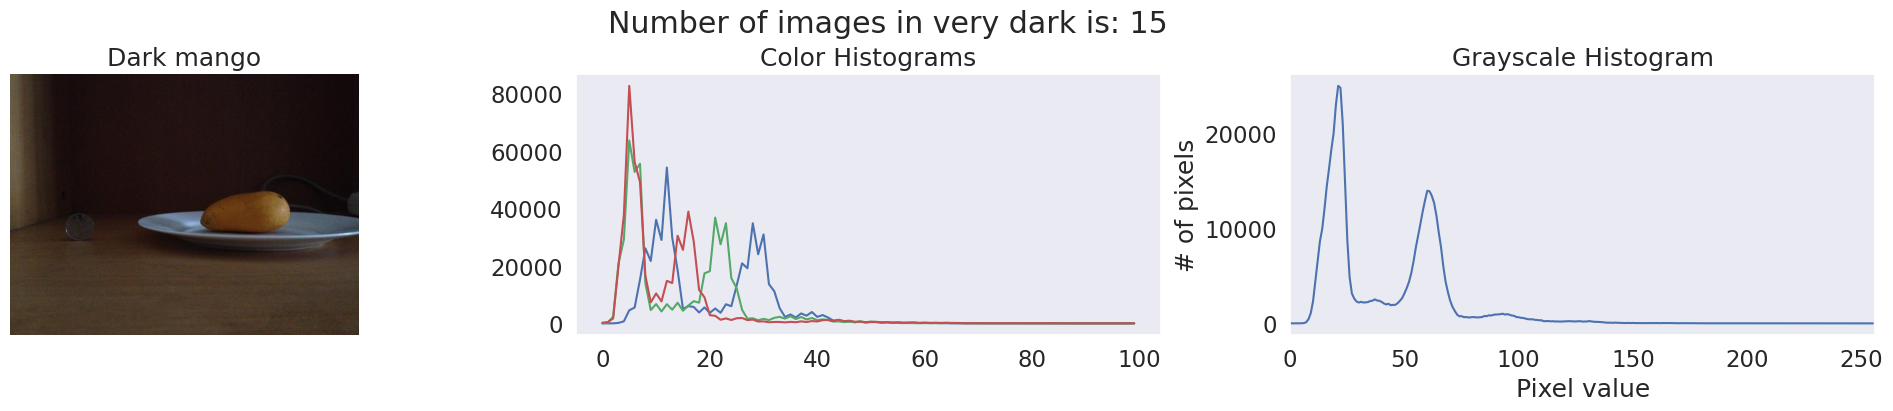

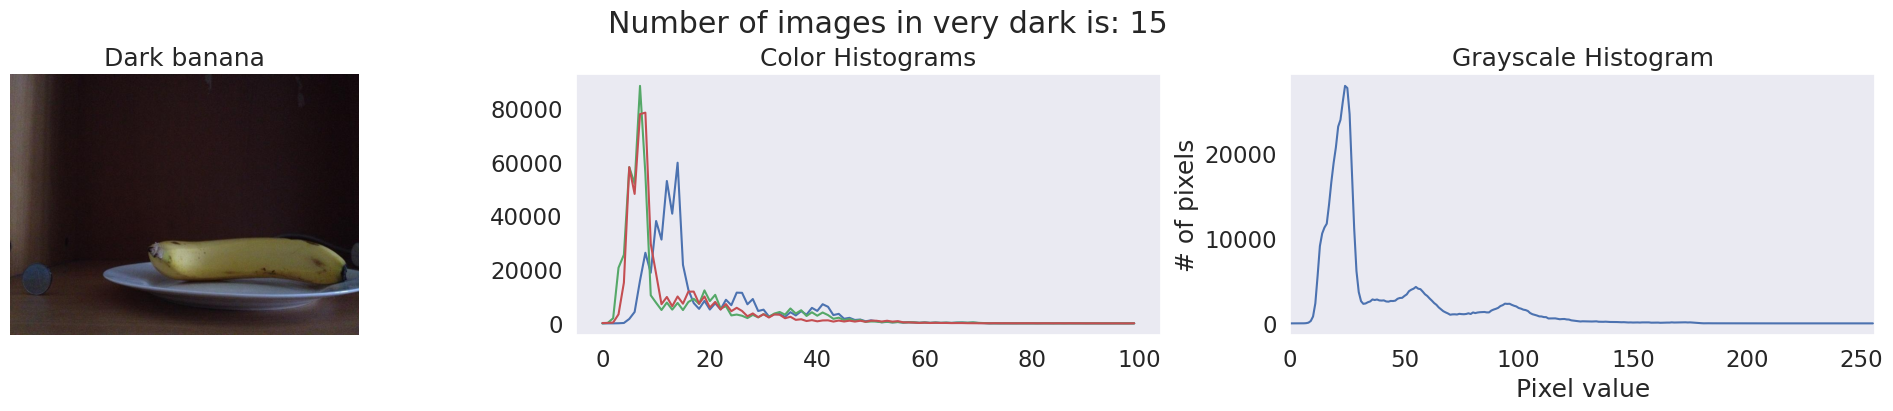

In [ ]:
for im in very_dark[:5]:
  tmp = im.split("/")[-1].split("0")[0]
  image = cv2.imread(im)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  fig, axes = plt.subplots(figsize=(20,4), ncols=3, nrows=1,constrained_layout=True)
  fig.suptitle("Number of images in very dark is: " + str(len(very_dark)))
  axes[0].imshow(image)
  axes[0].axis("off")
  axes[0].title.set_text("Dark " + tmp)
  histograms = get_color_histograms(image)
  plt.xlabel('Bin number')
  plt.ylabel('# of pixels')
  plt.xlim(0, 100)
  colors = ['b', 'g', 'r']
  for i, hist in enumerate(histograms):
    axes[1].plot(hist, color=colors[i])
    axes[1].title.set_text("Color Histograms")

  hist = get_gray_histogram(im)
  hist = hist.flatten()
  plt.title('Grayscale Histogram')
  plt.xlabel('Pixel value')
  plt.ylabel('# of pixels')
  plt.xlim(0, 256)
  axes[2].plot(hist)
  plt.show()

The color and greyscale histograms are shifted a lot to the left, with almost no pixel values above 70. Luckily though, only 15 images are very dark, and we might brighten them or just ignore it since it's about 0.5% of the dataset.

Let's make a new dataframe to keep all our color features:

In [ ]:
colors_df = pd.DataFrame(columns=['Image','red intensity','red std',
                                    'green intensity','green std',
                                    'blue intensity', 'blue std',
                                    'grey intensity','brighness'])
dict_list = []
for i, im in enumerate(total_df_cleaned_no_dups['Image']):
    image = cv2.imread(im)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    row_dict = {'Image': im,
                'red intensity': average_channel_intensity(image, "R"),
                'red std': standard_deviation_channel_intensity(image, "R"),
                'green intensity': average_channel_intensity(image, "G"),
                'green std': standard_deviation_channel_intensity(image, "G"),
                'blue intensity':average_channel_intensity(image, "B"),
                'blue std': standard_deviation_channel_intensity(image, "B"),
                'grey intensity':grayscale_intensity(image),
                'brighness':brightness(im)
                }
    dict_list.append(row_dict)
colors_df = pd.DataFrame.from_dict(dict_list)
colors_df.head()

Image  red intensity  \
0  /content/ECUSTFD-resized-/JPEGImages/doughnut0...     189.895869   
1  /content/ECUSTFD-resized-/JPEGImages/bread003S...     147.611734   
2  /content/ECUSTFD-resized-/JPEGImages/plum004T(...     181.570572   
3  /content/ECUSTFD-resized-/JPEGImages/tomato004...     168.042069   
4  /content/ECUSTFD-resized-/JPEGImages/orange009...     163.169935   

     red std  green intensity  green std  blue intensity   blue std  \
0  42.855552       165.430800  51.841408      135.606658  70.433830   
1  42.838944       114.698527  47.817255       75.271140  47.340771   
2  44.146131       153.168741  52.209569      118.002593  68.537144   
3  37.559576       135.835400  45.003347       98.110725  45.178663   
4  37.730563       133.370601  50.394449      101.691681  61.683386   

   grey intensity  brighness  
0      159.356329   0.690942  
1      106.652305   0.502204  
2      145.916260   0.647321  
3      128.212500   0.585793  
4      127.309488   0.575750

So far we explored colors and pixel intensity as features. now we'll look at some edges and corners as features:

In [ ]:
import skimage
from skimage.filters import laplace
from skimage import filters
from skimage.feature import hog
from skimage import data, exposure

def visualize_keypoints(image):
  img = image.copy()
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  sift = cv2.xfeatures2d.SIFT_create()
  kp, des = sift.detectAndCompute(gray, None)
  image = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  return image

def visualize_orb(img):
  orb = cv2.ORB_create()
  orb.setFastThreshold(10)
  orb.setMaxFeatures(500)
  kp = orb.detect(img,None)
  kp, des = orb.compute(img, kp)
  image = cv2.drawKeypoints(img, kp, None, (255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
  return image

def edges_view(img):
  img_ = cv2.imread(img)
  img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
  image = cv2.imread(img)
  img_canny = cv2.Canny(image, 0, 255)
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                      cells_per_block=(1, 1), visualize=True, channel_axis = 2)
  gray = np.float32(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY))
  image = skimage.color.rgb2gray(image)
  edge_roberts = filters.roberts(image)
  edge_sobel = filters.sobel(image)
  edge_laplace = filters.laplace(image, ksize=3, mask=None)
  edge_farid = filters.farid(image)
  sift = visualize_keypoints(img_)
  orb = visualize_orb(img_)
  edge_scharr= filters.scharr(image)
  harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
  harris_corners = cv2.dilate(harris_corners, None)
  harris_corners = cv2.threshold(harris_corners, 0.01, 255, cv2.THRESH_BINARY)[1]
  hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  fig, axes = plt.subplots(nrows=2, ncols=6, sharex=True, sharey=True,
                          figsize=(20,7))
  fig.suptitle("\n" + img.split("/")[-1].split("0")[0])
  axes[0, 0].imshow(img_)
  axes[0, 0].set_title("Original Image")
  axes[0, 0].axis('off')

  axes[0, 1].imshow(edge_sobel, cmap=plt.cm.gray)
  axes[0, 1].set_title('Sobel Edge Detection')
  axes[0, 1].axis('off')

  axes[0, 2].imshow(edge_laplace, cmap=plt.cm.gray)
  axes[0, 2].set_title('Laplace Edge Detection')
  axes[0, 2].axis('off')

  axes[0, 3].imshow(edge_farid, cmap=plt.cm.gray)
  axes[0, 3].set_title('Farid Edge Detection')
  axes[0, 3].axis('off')

  axes[0, 4].imshow(sift, cmap=plt.cm.gray)
  axes[0, 4].set_title('Sift')
  axes[0, 4].axis('off')

  axes[0, 5].imshow(edge_roberts, cmap=plt.cm.gray)
  axes[0, 5].set_title('Roberts Edge Detection')
  axes[0, 5].axis('off')

  axes[1, 0].imshow(gray, cmap=plt.cm.gray)
  axes[1, 0].set_title('Greyscale')
  axes[1, 0].axis('off')

  axes[1, 1].imshow(orb, cmap=plt.cm.gray)
  axes[1, 1].set_title('Orb')
  axes[1, 1].axis('off')

  axes[1, 2].imshow(hog_image_rescaled, cmap=plt.cm.gray)
  axes[1, 2].set_title('HOG')
  axes[1, 2].axis('off')

  axes[1, 3].imshow(harris_corners, cmap=plt.cm.gray)
  axes[1, 3].set_title('Corner Harris')
  axes[1, 3].axis('off')

  axes[1, 4].imshow(img_canny, cmap=plt.cm.gray)
  axes[1, 4].set_title('Canny Edge Detection')
  axes[1, 4].axis('off')

  axes[1, 5].imshow(edge_scharr, cmap=plt.cm.gray)
  axes[1, 5].set_title('Scharr Edge Detection')
  axes[1, 5].axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
classes = list(total_df_cleaned_no_dups["class"].unique())
for cls in classes:
  for im in total_df_cleaned_no_dups["Image"]:
    if im.split("/")[-1].split("0")[0] == cls:
      edges_view(im)
      break

Above we see some common edge detectors and ORB and SIFT discriptors, for a sample from each class.
it looks that for some classes with distinct visual features, ORB and SIFT give a lot of "Keypoints" to be used (bun, grape, litchi, doughnut, fired_dough_twist), and for the rest some edge detectors - "Scharr", "Sobel" and "Farid", filter the images edges clearly, but other edges detectors like "Laplace", "Canny" and "Harris" fail to give distinct results. it also looks like HOG is showing enough discriptors on all classes. we tried to keep our features in a dataframe, but colab keeps crashing, so we decided not to. now we'll try to clusters our images.

## Summary

We examined color disturbution of all images and also per class.
We examined pixel intensity, greyscale histograms and several edge detections.


## Clustering

Now we try to cluster the images based on the features - we will use HOG discriptors and PCA for this.

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from skimage.transform import resize

from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
images = filenames = list(total_df_cleaned_no_dups['Image'])

We resize our images since the original size is crashing colab.

In [ ]:
def extract_hog(img):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # get the feature vector
    image = resize(image, (256,256))
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                        cells_per_block=(1, 1), visualize=True, channel_axis = 2)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return image, fd, hog_image_rescaled

In [ ]:
data = {}
hog_images = {}
r_ims = {}
for img in images:
    resized, fd, hog_image_rescaled = extract_hog(img)
    data[img] = fd
    hog_images[img] = hog_image_rescaled
    r_ims[img] = resized


Let's see some images and their HOG descriptors

In [ ]:
count = 0
for name, img in r_ims.items():
  if count == 10:
      break
  for k,v in hog_images.items():
    if count == 10:
      break
    if k == name:
      count +=1
      fig, ax = plt.subplots(figsize=(12, 12), ncols=2)
      ax[0].imshow(img)
      ax[0].axis('off')
      ax[1].imshow(v, cmap ="gray")
      ax[1].axis('off')
      plt.show()


In [ ]:
filenames = np.array(list(data.keys()))
feat = np.array(list(data.values()))
feat.shape

(2925, 512)

In [ ]:
df = pd.read_csv("/content/total.csv")
label = df['class'].tolist()
unique_labels = list(set(label))

We can see that the HOG discriptor is a vector of size 512. Now we'll use PCA to further reduce it.

In [ ]:
pca_dims = PCA()
pca_dims.fit(feat)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

197


In [ ]:
pca = PCA(d)
X_reduced = pca.fit_transform(feat)
X_recovered = pca.inverse_transform(X_reduced)
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (2925, 197)
recovered shape: (2925, 512)


Now we try to cluster the reduced PCA features using Kmeans

In [ ]:
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(X_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20, random_state=22)

In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
import collections

def view_cluster(cluster,threshold):
    files = groups[cluster]
    major = []
    for file in files:
      tmp = file.split("/")[-1].split("0")[0]
      major.append(tmp)
    counter = collections.Counter(major)
    most_common = counter.most_common(2)
    if 100*most_common[0][1]/len(files) > threshold:
      plt.figure(figsize = (25,25))
      print("cluster:" , cluster)
      print("most common class is:" ,most_common[0][0])
      print("with",most_common[0][1] , "occurrences out of" , len(files),", which is: ", 100*most_common[0][1]/len(files), "%")
      if len(most_common) > 1:
        print("second most common class is:" ,most_common[1][0])
        print("with",most_common[1][1] , "occurrences out of" , len(files),", which is: ", 100*most_common[1][1]/len(files), "%")
      # only allow up to 10 images to be shown at a time
      if len(files) > 10:
          random_10 = random.sample(files, 10)
      else:
        random_10 = files

      for index, file in enumerate(random_10):
          plt.subplot(10,10,index+1)
          img = load_img(file)
          img = np.array(img)
          plt.imshow(img)
          plt.axis('off')
    else:
      return cluster

Let's visualize:

In [ ]:
for i in range(20):
  view_cluster(i,0)
  plt.show()

The clusters are very bad. it seems that the clusters are based mainly on the angle the image was taken from - i.e. side or top, and than on colors or the form of the fruits. We need better features. Based on what we can see, maybe better features would be SIFT descriptors, as they are robust to angle changes.

Let's check if the clustering works better when using all the HOG features without PCA.

In [ ]:
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(X_recovered)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20, random_state=22)

In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
for i in range(20):
  view_cluster(i,0)
  plt.show()

Still the accuracy isn't good. Let's look at the 4 leading PCA's

In [ ]:
PC1 = X_reduced[:,0]
PC2 = X_reduced[:,1]
PC3 = X_reduced[:,2]
PC4 = X_reduced[:,3]
zipped = list(zip(PC1,
                  PC2,
                  PC3,
                  PC4))

pc_df = pd.DataFrame(zipped,
                     columns=['PC1',
                              'PC2',
                              'PC3',
                              'PC4'])

In [ ]:
key = data.keys()
value = data.values()
zipped1 = list(zip(key,value))
pdf = pd.DataFrame(zipped1,
                     columns=['name',
                              'features'])
pdf.head()

name  \
0  /content/ECUSTFD-resized-/JPEGImages/lemon002S...   
1  /content/ECUSTFD-resized-/JPEGImages/plum001S(...   
2  /content/ECUSTFD-resized-/JPEGImages/apple015T...   
3  /content/ECUSTFD-resized-/JPEGImages/fired_dou...   
4  /content/ECUSTFD-resized-/JPEGImages/litchi005...   

                                            features  
0  [0.36357906918477606, 0.36357906918477606, 0.3...  
1  [0.38681639717771404, 0.38681639717771404, 0.2...  
2  [0.35355339053803103, 0.35355339053803103, 0.3...  
3  [0.4471255958437505, 0.4471255958437505, 0.215...  
4  [0.4578570781975426, 0.4578570781975426, 0.219...

In [ ]:
import plotly.express as px

df = pc_df
features = ["PC1", "PC2", "PC3", "PC4"]

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_reduced,
    labels=labels,
    dimensions=range(4),
    color=0
)
fig.update_traces(diagonal_visible=False)
fig.show()

We can see that even the leading PCA's aren't giving us any clear separation of the data.

As stated above, we should look for other features, or maybe combine several feature types - HOG, SIFT, color distributions?


Instead, we will extract general features using VGG16 as an extractor:

In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

553467096/553467096 [==============================] - 14s 0us/step


In [ ]:
data = {}
for img in images:
    feat = extract_features(img,model)
    data[img] = feat

1/1 [==============================] - 0s 18ms/step


In [ ]:
filenames = np.array(list(data.keys()))
feat = np.array(list(data.values()))
feat.shape

(2925, 1, 4096)

In [ ]:
feat = feat.reshape(-1,4096)
feat.shape

(2925, 4096)

In [ ]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(feat)
X_recovered = pca.inverse_transform(X_reduced)
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (2925, 342)
recovered shape: (2925, 4096)


We can see that there are much more features taken into consideration, before with only HOG discriptors we had 512 before PCA and 197 after PCA


In [ ]:
n_clusters=len(unique_labels)
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(X_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=20, random_state=22)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
PC1 = X_reduced[:,0]
PC2 = X_reduced[:,1]
PC3 = X_reduced[:,2]
PC4 = X_reduced[:,3]
zipped = list(zip(PC1,
                  PC2,
                  PC3,
                  PC4))

pc_df = pd.DataFrame(zipped,
                     columns=['PC1',
                              'PC2',
                              'PC3',
                              'PC4'])
pc_df.head()

PC1        PC2        PC3        PC4
0 -29.043890  -9.722710  21.890461  -2.758394
1 -21.031504 -23.576134  -4.999803  -7.222587
2  40.684391 -24.246174  -9.751062  -0.769047
3 -19.394325  14.526007 -20.053473  -5.242429
4 -28.297918  -6.543782  -8.561453  15.656029

In [ ]:
key = data.keys()
value = data.values()
zipped1 = list(zip(key,value))
pdf = pd.DataFrame(zipped1,
                     columns=['name',
                              'features'])
pdf.head()

name  \
0  /content/ECUSTFD-resized-/JPEGImages/lemon002S...   
1  /content/ECUSTFD-resized-/JPEGImages/plum001S(...   
2  /content/ECUSTFD-resized-/JPEGImages/apple015T...   
3  /content/ECUSTFD-resized-/JPEGImages/fired_dou...   
4  /content/ECUSTFD-resized-/JPEGImages/litchi005...   

                                            features  
0  [[0.87202215, 0.0, 0.0, 2.7434797, 0.0, 0.0, 2...  
1  [[0.0, 1.2656908, 1.2727499, 0.0, 0.0, 0.0, 4....  
2  [[0.7305399, 0.0, 1.3566109, 1.0843967, 0.0, 0...  
3  [[0.6987993, 0.46569183, 0.7944038, 0.0, 2.667...  
4  [[0.0, 4.939248, 0.0, 2.5319526, 1.0879436, 0....

In [ ]:
df = pc_df
features = ["PC1", "PC2", "PC3", "PC4"]

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_reduced,
    labels=labels,
    dimensions=range(4),
    color=0
)
fig.update_traces(diagonal_visible=False)
fig.show()

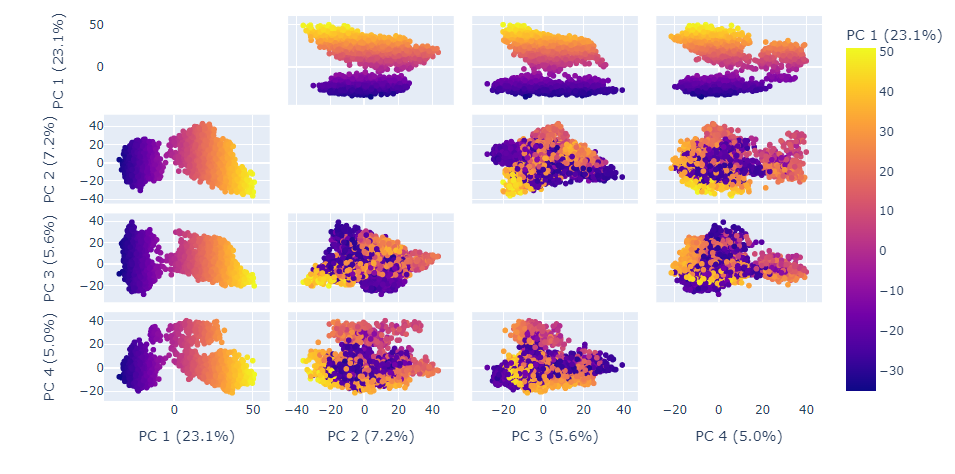

Looks like the leading PC is much more prominent, we already have some separation.

In [ ]:
for i in range(20):
  view_cluster(i,0)
  plt.show()

We can see much better clustering, but still not perfect. let's try to find an optimal K:

k  20  is done.
k  40  is done.
k  60  is done.
k  80  is done.


Text(0, 0.5, 'Sum of squared distance')

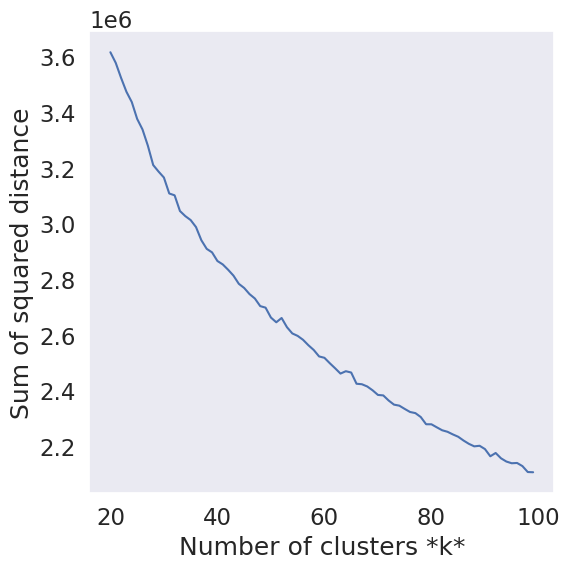

In [ ]:
sse = []
list_k = list(range(20, 100))

for k in list_k:
    km = KMeans(n_clusters=k,n_init= 10, random_state=22)
    km.fit(X_reduced)
    sse.append(km.inertia_)
    if k%20 ==0:
      print("k ", k, " is done.")

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [ ]:
k=60
kmeans = KMeans(n_clusters=k, random_state=22)
kmeans.fit(X_reduced)
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Let's check if any clusters have more than 50% of the same class:

In [ ]:
bad_clusters = []
for i in range(60):
  bad_cluster = view_cluster(i,50)
  bad_clusters.append(bad_cluster)
  plt.show()

We see that with a threshold of 50% we still get a decent clustering, some clusters are 100% the same class, we can check the ones who are not very distinct:

In [ ]:
view = []
for i in range(60):
  if bad_clusters[i]:
    view.append(bad_clusters[i])

Let's view:

In [ ]:
for i in view:
  _ = view_cluster(i,0)
  plt.show()

## Summary
We used HOG descriptors for PCA for a preparation to the clustering stage.
As we have seen, the clustering is challenging because of several things:

1. Red/white plates are clustered together
2. Images taken from the side are different than images taken from above
3. Images without plate are clustered together
4. Images with more than two objects are clustered together

We organized the images in 60 clusters. We used few different methods for the cluster technique, with and without PCA, with K = 20 and K =60, and with HOG discriptors and general features extracted with VGG16. We got decent results using the extracted VGG features with PCA.

What we are going to do is augment our dataset, to fix the class imbalance and help with our findings from the clustering.